In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('join_projection.csv')

In [23]:
df

,Biomass,Straw,Willow,Miscanthus
0,2009-2014,264307.000000,12546.500000,35586.8
1,2015-2020,674706.814815,15727.136364,41789.7
2,2021-2026,699215.444444,10738.409091,36050.6
3,2027-2032,699215.444444,10738.409091,36050.6
4,2033-2038,699215.444444,10738.409091,36050.6
5,2039-2044,699215.444444,10738.409091,36050.6
6,2045-2050,699215.444444,10738.409091,36050.6


In [79]:
#df['Miscanthus'] = df['Miscanthus'].astype('int', errors='ignore') #This converts the dates to strings: useful as index

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Biomass     7 non-null      object 
 1   Straw       7 non-null      float64
 2   Willow      7 non-null      float64
 3   Miscanthus  7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes


In [28]:
df = df.set_index('Biomass') # This line finally sets df['Biomass'] as the index column

In [25]:
df.dtypes

Biomass        object
Straw         float64
Willow        float64
Miscanthus    float64
dtype: object

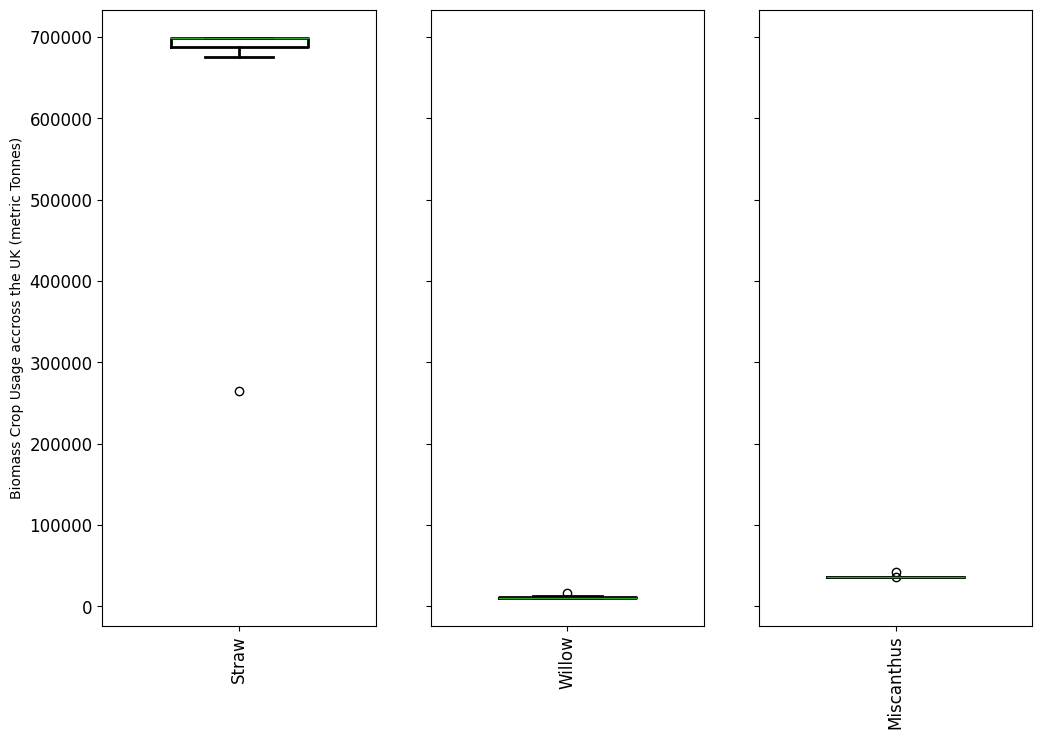

In [29]:

boxprops=dict(linewidth=2)
capprops=dict(linewidth=2)
whiskerprops=dict(linewidth=2)
# By using subplots, fragments of each plots are displayed for each columns
df.plot(kind='box', boxprops=boxprops, capprops=capprops, 
        whiskerprops=whiskerprops, subplots=True, sharex=False, use_index=True, 
        grid=False, style=['classic'], widths=0.5, fontsize=12, sharey=True, rot=(90), 
        figsize=(12,8), ylabel='Biomass Crop Usage accross the UK (metric Tonnes)')

#plt.show()
plt.savefig('box_projection.svg', dpi=700, bbox_inches='tight')

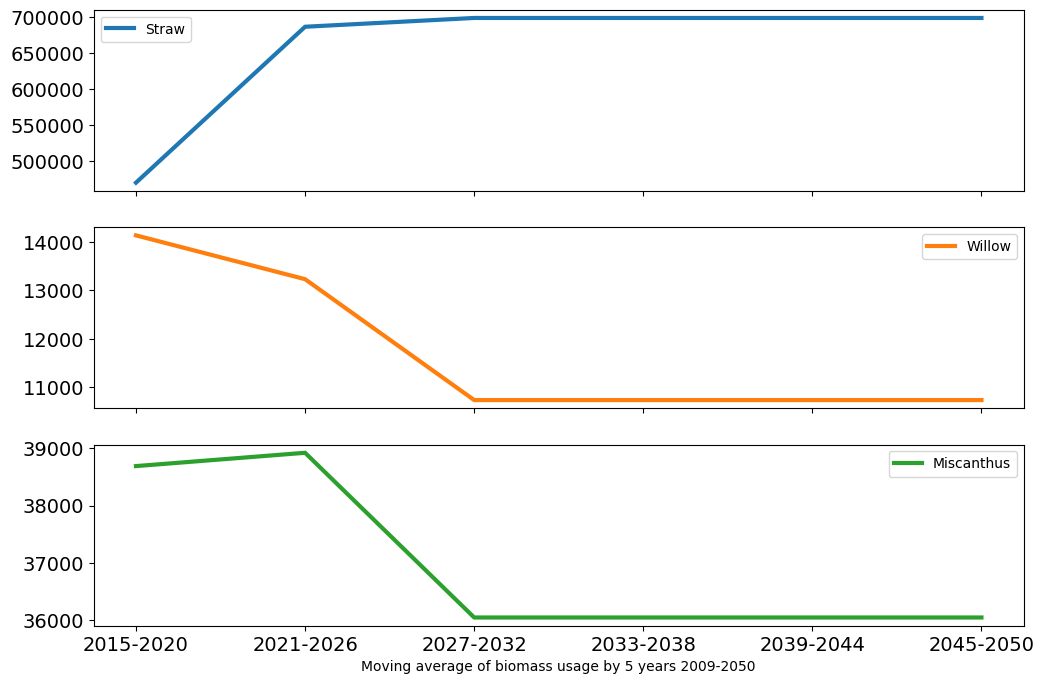

In [31]:
# Rolling window for each columns at rolling window = 2 years
df.rolling(2).mean().plot(kind='line', fontsize=14, subplots=True, 
                           linewidth=3, grid=False, sharex=True, use_index=True, 
                           figsize=(12,8), 
                           xlabel='Moving average of biomass usage by 5 years 2009-2050')

plt.savefig('usage_Rolling_window_projection.svg', bbox_inches='tight') #Save a clear plot with .svg